# Physics 494/594
## Building a Feed Forward Neural Network


In [1]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s.set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

OSError: './include/notebook.mplstyle' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

## Last Time

### [Notebook Link: 02_NN_Structure_Feed_Forward.ipynb](./02_NN_Structure_Feed_Forward.ipynb)

- Built our first neural network
- randomly assigned weights and biases
- performed activiations one layer at a time

## Today

- Write code to propagate activations through layers
- Manually 'train' to discern features

### Recall our 3x3 picture

I've defined a function `print_rectangle(...)` that will allows for code resuse.  This is a great programming practice!

In [10]:
L = 3
N0 = L*L
x = [0,0,0,1,1,0,1,1,0]

def print_rectangle(x):
    print(''.join([ci if (i+1)%L else ci+'\n' for i,ci in 
                 enumerate([' ▉ ' if cx else ' ░ ' for i,cx in enumerate(x)])]))
print_rectangle(x)

 ░  ░  ░ 
 ▉  ▉  ░ 
 ▉  ▉  ░ 



In [11]:
def print_rectangle_1(x):
    L = int(np.sqrt(len(x)))
    print(*[''.join(i) for i in np.array([' ▉ ',' ░ '])[x].reshape(L,L)],sep='\n')

In [12]:
g = np.array([[1,1,1],[0,0,0],[2,2,2]])
np.sum(g,axis=1)

array([3, 0, 6])

In [13]:
print_rectangle(x)

 ░  ░  ░ 
 ▉  ▉  ░ 
 ▉  ▉  ░ 




## Feed Forward

Previously we manually propagated activations through a deep neural network one layer at a time. 

Recall, that for a single layer: 
\begin{align}
a_j^\ell &= \sigma\left(\boldsymbol{z}^{\ell}\right) \\
&= \sigma \left(\sum_k w_{jk}^\ell a_k^{\ell-1} + b_j^\ell \right) \\
 &= \sigma\left(\boldsymbol{\mathsf{w}}^\ell \cdot \boldsymbol{a}^{\ell-1} + \boldsymbol{b}^\ell\right)
\end{align}

Given the values in the input layer $\boldsymbol{x} \equiv \boldsymbol{a}^0$, and all weights and biases, we want to compute $\boldsymbol{z}^{\ell}$, apply the activations sequentially to each layer, and return the output of the entire network.

In [14]:
def feed_forward(a0,w,b):
    ''' Compute the output of a deep neural network given the input (a0) 
        and the weights (w) and biaes (b).
    '''
    a = a0
    num_layers = len(b)
    
    # feed input layer forward
    for ℓ in range(num_layers):
        z = w[ℓ] @ a + b[ℓ]
        a = 1.0/(1.0 + np.exp(-z))
    return a

Next, we will randomly set all the weights and biases for the 1 hidden and 1 output layer of our network.  We used a hidden-layer with only 2 neurons, feel free to change this when  you are working on your notebook.

In [33]:
N = [9,2,1]
w,b = [],[] 

# append to the weights and biases list.  Make sure you get the dimensions correct!
for ℓ in range(1,len(N)):
    w.append(np.random.uniform(low=-10,high=10,size=(N[ℓ],N[ℓ-1])))
    b.append(np.random.uniform(low=-1,high=1,size=N[ℓ])) 

In [13]:
print(w)

[array([[-0.14166847, -0.95402247, -1.04471926,  4.52876878,  4.96055752,  3.2066347 ,  6.74889734, -2.05632829,
        -6.98825264],
       [ 0.87743332,  3.7250315 , -8.67064957,  6.40588208,  8.19545657,  6.76673155, -8.44652376, -7.57849762,
        -1.6208661 ]]), array([[-2.45758131, -2.18621624]])]


In [14]:
b

[array([0.58239781, 0.77264312]), array([0.80587981])]

Let's compute (and output) the activation of the output layer. 

We can keep randomly generating new weights and biases (by executing the code above) until we find a set that is close to 1 (which we want for our rectangle)

In [34]:
feed_forward(x,w,b)

array([0.99689894])

### Visualize the Final Network:

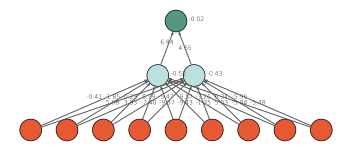

In [24]:
ml4s.draw_network(N, weights=w, biases=b, node_labels=[])

<div class="span alert alert-success">
<h4> Excercises </h4>
<ol>
    <li>Find the output from the neural network for the following inputs 
        <p>
            <code>x = [1,1,1,0,0,0,0,0,0]</code> <br />
            <code>x = [1,0,0,0,1,0,0,0,1]</code> <br />
            <code>x = [0,0,0,0,0,0,0,0,1]</code> <br />
        </p>
       You can use the <code>print_rectangle(x)</code> function to visualize.
    </li>
    <li> Modify your <code>feed_forward</code> function to use a ReLU instead of a sigmoid.  Are there any changes?
    </li>
</ol>
</div>

In [35]:
#Part 1
L = 3
N0 = L*L
x2 = [1,1,1,0,0,0,0,0,0]

def print_rectangle(x2):
    print(''.join([ci if (i+1)%L else ci+'\n' for i,ci in 
                 enumerate([' ▉ ' if cx else ' ░ ' for i,cx in enumerate(x2)])]))
print_rectangle(x2)

 ▉  ▉  ▉ 
 ░  ░  ░ 
 ░  ░  ░ 



In [36]:
feed_forward(x2,w,b)

array([0.99656455])

In [37]:
L = 3
N0 = L*L
x3 = [1,0,0,0,1,0,0,0,1]

def print_rectangle(x3):
    print(''.join([ci if (i+1)%L else ci+'\n' for i,ci in 
                 enumerate([' ▉ ' if cx else ' ░ ' for i,cx in enumerate(x3)])]))
print_rectangle(x3)

 ▉  ░  ░ 
 ░  ▉  ░ 
 ░  ░  ▉ 



In [38]:
feed_forward(x3,w,b)

array([0.99680173])

In [42]:
L = 3
N0 = L*L
x4 = [0,0,0,0,0,0,0,0,1]

def print_rectangle(x4):
    print(''.join([ci if (i+1)%L else ci+'\n' for i,ci in 
                 enumerate([' ▉ ' if cx else ' ░ ' for i,cx in enumerate(x4)])]))
print_rectangle(x4)

 ░  ░  ░ 
 ░  ░  ░ 
 ░  ░  ▉ 



In [43]:
feed_forward(x4,w,b)

array([0.03292485])


# Conclusion
Based on the last two examples, the code does not seem to have learned.

In [87]:
#Part 2
def feed_forward2(a0,w,b):
    ''' Compute the output of a deep neural network given the input (a0) 
        and the weights (w) and biaes (b).
    '''
    a = a0
    num_layers = len(b)
    
    # feed input layer forward
    for ℓ in range(num_layers):
        z = w[ℓ] @ a + b[ℓ]
        a = np.maximum(z, 0)
    return a

In [88]:
feed_forward2(x,w,b)

array([124.57335297])

In [89]:
feed_forward2(x2,w,b)

array([25.52268474])

In [90]:
feed_forward2(x3,w,b)

array([116.23771722])

In [91]:
feed_forward2(x4,w,b)

array([0.])

While not normalized, using the same weights and biases, it does not seem to be performing much better. The last example particularly gets the the rectangle question completely wrong. However, there is an improvement with the second test in comparison to the sigmoid. Where the sigmoid believed that x3 was a rectangle with high certainty, the ReLU did believe that is was significantly less likely than x and x2; which is correct. Both are wrong on x4. So there was a minor improvement overall.